In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import cv2
import matplotlib.pylab as plt

# ***Feature Analysis***

In [ ]:
disease_1=glob('../input/disease-hair/Hair_Diseases/train/Alopecia Areata/*.jpg')

In [6]:
img1=plt.imread(disease_1[1])
image=cv2.imread(disease_1[1])
img1

array([[[190, 188, 167],
        [191, 189, 168],
        [191, 189, 168],
        ...,
        [178, 182, 159],
        [177, 182, 159],
        [177, 182, 159]],

       [[190, 188, 167],
        [191, 189, 168],
        [191, 189, 168],
        ...,
        [178, 182, 159],
        [177, 182, 159],
        [177, 182, 159]],

       [[190, 188, 167],
        [191, 189, 168],
        [191, 189, 168],
        ...,
        [178, 182, 159],
        [178, 182, 159],
        [178, 182, 159]],

       ...,

       [[158, 112,  79],
        [158, 112,  79],
        [157, 111,  78],
        ...,
        [118,  71,  55],
        [113,  65,  51],
        [118,  70,  56]],

       [[158, 112,  79],
        [158, 112,  79],
        [157, 111,  78],
        ...,
        [119,  72,  56],
        [114,  66,  52],
        [119,  71,  57]],

       [[158, 112,  79],
        [158, 112,  79],
        [157, 111,  78],
        ...,
        [120,  73,  57],
        [116,  68,  54],
        [122,  74,  60]]

In [7]:
img1.shape

(512, 512, 3)

In [8]:
img1.flatten()

array([190, 188, 167, ..., 122,  74,  60], dtype=uint8)

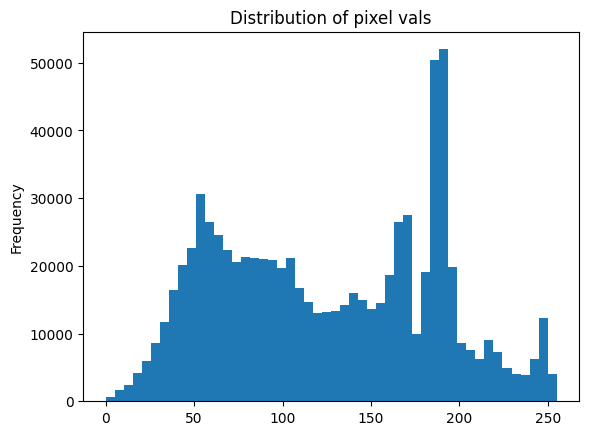

In [9]:
pd.Series(img1.flatten()).plot(kind='hist',bins=50,title='Distribution of pixel vals')
plt.show()

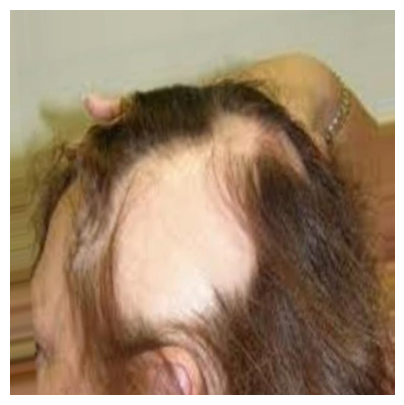

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(img1)
ax.axis('off')
plt.show()

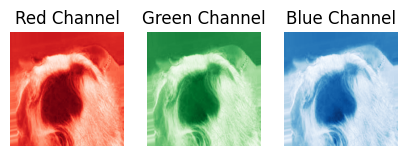

In [11]:
fig,axs=plt.subplots(1,3,figsize=(5,5))

axs[0].imshow(img1[:,:,0],cmap='Reds')
axs[1].imshow(img1[:,:,1],cmap='Greens')
axs[2].imshow(img1[:,:,2],cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')

plt.show()

In [12]:
img_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
img_gray.shape

(512, 512)

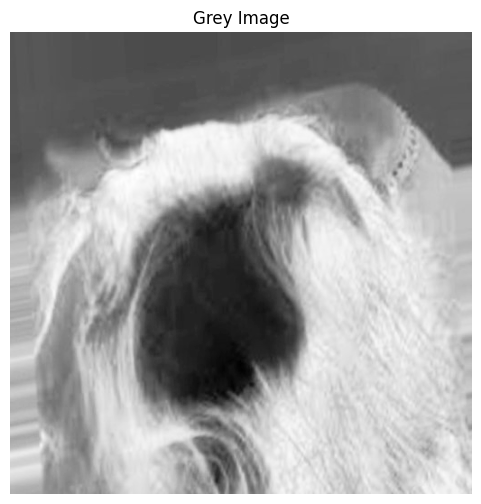

In [13]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img_gray,cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

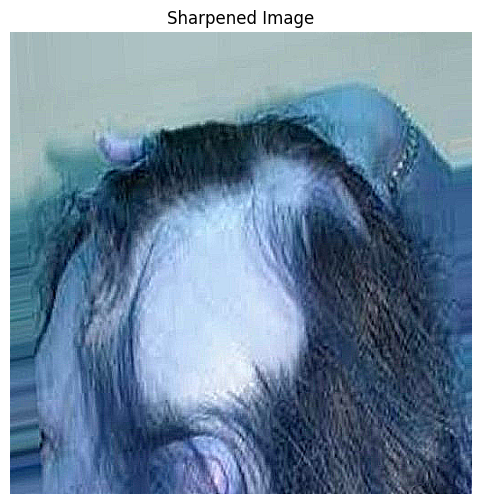

In [14]:
#Sharpening
kernel_sharpening=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened=cv2.filter2D(image,-1,kernel_sharpening)

fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

# ***Train,Validate,Test***

In [15]:
import os
from skimage.io import imread
from skimage.transform import resize

In [16]:
input_dir='/kaggle/input/disease-hair/Hair_Diseases/train'
categories=['Alopecia Areata','Contact Dermatitis','Folliculitis','Head Lice','Lichen Planus','Male Pattern Baldness','Psoriasis','Seborrheic Dermatitis','Telogen Effluvium','Tinea Capitis']
data=[]
labels=[]
for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        img=imread(img_path)
        img=resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)

data=np.asarray(data)
labels=np.asarray(labels)

In [17]:
data

array([[2.37122321e-02, 3.18110238e-02, 9.95473098e-02, ...,
        4.10721707e-04, 4.98287534e-04, 1.97004021e-03],
       [7.34645672e-01, 7.29459449e-01, 6.49568569e-01, ...,
        3.57639116e-01, 2.24169218e-01, 1.57514087e-01],
       [2.66238133e-02, 2.78409293e-02, 2.24690598e-02, ...,
        1.13060389e-01, 1.18428190e-01, 1.08614032e-01],
       ...,
       [2.71198472e-01, 2.05719167e-01, 1.50010235e-01, ...,
        8.60244955e-01, 6.32580864e-01, 6.10706975e-01],
       [4.40208416e-02, 3.89179003e-02, 2.13919053e-02, ...,
        2.76917132e-01, 1.98046811e-01, 1.10811823e-01],
       [3.34112554e-01, 2.04645503e-01, 1.30091271e-01, ...,
        9.05836126e-02, 7.86944979e-02, 7.94267551e-02]])

In [18]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
print(data.shape)
print(labels.shape)

(9600, 675)
(9600,)


In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
train_data = scaler.fit_transform(data)

svm = SVC(kernel='rbf',gamma='auto' C=10)
svm.fit(train_data,labels)

SVC(C=1, kernel='linear')

In [32]:
train_data

array([[-1.26022619, -1.15180017, -0.85141283, ..., -1.44194284,
        -1.34528481, -1.24582147],
       [ 0.99266213,  1.10821165,  0.94374851, ..., -0.27776849,
        -0.55789514, -0.68362886],
       [-1.25099963, -1.16466117, -1.10298109, ..., -1.07482798,
        -0.9301357 , -0.8603714 ],
       ...,
       [-0.4759631 , -0.58842979, -0.68671175, ...,  1.36017753,
         0.87983801,  0.95437462],
       [-1.19586991, -1.12877765, -1.10649671, ..., -0.54083398,
        -0.64985395, -0.85242779],
       [-0.27659366, -0.59190789, -0.75172334, ..., -1.14807772,
        -1.07001038, -0.96586481]])

In [33]:
input_dir1='/kaggle/input/disease-hair/Hair_Diseases/val'
categories1=['Alopecia Areata','Contact Dermatitis','Folliculitis','Head Lice','Lichen Planus','Male Pattern Baldness','Psoriasis','Seborrheic Dermatitis','Telogen Effluvium','Tinea Capitis']
data1=[]
labels1=[]
for category_idx,category in enumerate(categories1):
    for file in os.listdir(os.path.join(input_dir1,category)):
        img_path=os.path.join(input_dir1,category,file)
        img=imread(img_path)
        img=resize(img,(15,15))
        data1.append(img.flatten())
        labels1.append(category_idx)

data1=np.asarray(data1)
labels1=np.asarray(labels1)

In [34]:
data1.shape

(1200, 675)

In [35]:
input_dir2='/kaggle/input/disease-hair/Hair_Diseases/test'
categories2=['Alopecia Areata','Contact Dermatitis','Folliculitis','Head Lice','Lichen Planus','Male Pattern Baldness','Psoriasis','Seborrheic Dermatitis','Telogen Effluvium','Tinea Capitis']
data2=[]
labels2=[]
for category_idx,category in enumerate(categories2):
    for file in os.listdir(os.path.join(input_dir2,category)):
        img_path=os.path.join(input_dir2,category,file)
        img=imread(img_path)
        img=resize(img,(15,15))
        data2.append(img.flatten())
        labels2.append(category_idx)

data2=np.asarray(data2)
labels2=np.asarray(labels2)

In [36]:
data2.shape

(1200, 675)

In [39]:
val_data = scaler.transform(data1)
test_data = scaler.transform(data2)

In [40]:
val_data

array([[ 1.8013466 ,  1.97643008,  2.0670497 , ..., -0.16502261,
         0.07256071,  0.27150214],
       [-0.76098934,  0.01738362,  0.64803154, ..., -0.22318484,
        -0.28428945, -0.4093594 ],
       [-0.60934895, -0.5652987 , -0.75108146, ...,  1.17675688,
         1.06541676,  0.88923867],
       ...,
       [-0.75917518, -0.65466473, -0.62804004, ..., -0.80846832,
        -0.65039252, -0.55874111],
       [-0.42518451, -0.32314132, -0.3318654 , ..., -1.18944726,
        -1.05904434, -1.02814958],
       [ 0.84014229,  1.07072708,  1.20512821, ..., -0.99420876,
        -0.80471632, -0.82166732]])

In [41]:
test_data

array([[ 0.09919764, -0.03224629,  0.3440354 , ..., -1.33118618,
        -1.13158405, -0.96428611],
       [-1.11085133, -1.10370251, -1.01069338, ..., -1.44328134,
        -1.34703893, -1.25294191],
       [-1.00580531, -0.92165732, -0.89787357, ..., -1.32107066,
        -0.8134279 , -0.66987832],
       ...,
       [ 1.82055486,  1.97153801,  2.07441729, ...,  1.81562535,
         2.17326402,  2.36141968],
       [-0.73865584, -0.97044531, -1.03923384, ...,  1.28696521,
         0.86123761,  0.45808689],
       [ 1.76360389,  1.91620094,  2.01960431, ..., -1.14950722,
        -0.93855236, -0.88438649]])

In [42]:
val_predictions = svm.predict(val_data)
val_accuracy = accuracy_score(labels1, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

test_predictions = svm.predict(test_data)
test_accuracy = accuracy_score(labels2, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Validation Accuracy: 66.50%
Test Accuracy: 66.08%
